In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('UBER_TRAIN.csv')
training_set = dataset_train.iloc[:, 1:2].values

dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
timesteps = 10
X_train = []
y_train = []
for i in range(timesteps, 133):
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [6]:
epochs_count = 100
batch_size = 32

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = "adam", loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = epochs_count, batch_size=batch_size)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
123/123 [==============================] - 4s 31ms/step - loss: 0.3174
Epoch 2/100
123/123 [==============================] - 0s 1ms/step - loss: 0.2117
Epoch 3/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0794
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 5/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 7/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0354
Epoch 8/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 10/100
123/123 [========================

123/123 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 78/100
123/123 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 79/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 80/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 81/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 82/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 83/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 84/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 85/100
123/123 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 86/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 87/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 88/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 89/100
123/

In [7]:
dataset_test = pd.read_csv('UBER_TEST.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [9]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(timesteps, timesteps+15):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

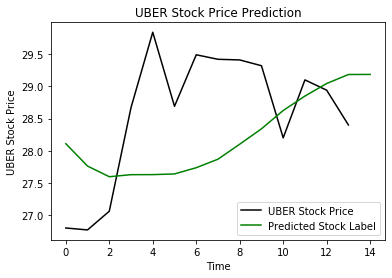

In [10]:
plt.plot(real_stock_price, color = 'black', label = 'UBER Stock Price')
plt.plot(predicted_stock_price, color = 'green', label ='Predicted Stock Label')
plt.title('UBER Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('UBER Stock Price')
plt.legend()
plt.show() 